In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
#Checking loading of data frame
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
# Data Cleaning Function (modify)
def clean_data(df):
  clean_df = df.copy()
  clean_df = clean_df.drop('Unnamed: 0', axis=1, errors='ignore')
  clean_df = clean_df.dropna()

  #Encode explicit column (binary encoding)
  clean_df['explicit'] = clean_df['explicit'].astype(int)

  # Drop track_id, artisits,album_name
  clean_df = clean_df.drop(['track_id', 'artists', 'album_name','track_name'], axis=1)

  # Lets look at classification of track genres
  # Need to encode the track_genre
  le = LabelEncoder()
  clean_df['track_genre'] = le.fit_transform(clean_df['track_genre'])

  return clean_df, le

# Apply the function to the DataFrame
spotify_clean, le = clean_data(df)

In [5]:
#Looking at cleaned data frame
spotify_clean.sample(15)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
83839,47,210505,0,0.502,0.55400,10,-5.788,1,0.0317,0.035300,0.000000,0.6200,0.5120,125.786,4,83
1397,23,262040,0,0.458,0.88500,6,-4.310,0,0.0582,0.002590,0.003050,0.3250,0.8260,195.646,4,1
108315,22,243893,0,0.537,0.08310,1,-17.119,0,0.0752,0.943000,0.000000,0.1060,0.1300,96.526,3,108
13624,9,617800,0,0.703,0.72600,7,-10.332,1,0.0464,0.005750,0.877000,0.1380,0.0751,106.008,4,13
12976,18,233333,0,0.447,0.37500,3,-13.111,0,0.0272,0.717000,0.004610,0.1020,0.2290,180.151,3,12
7185,28,179573,0,0.531,0.55200,2,-7.846,1,0.0324,0.676000,0.000008,0.1090,0.8160,80.945,4,7
4980,50,293826,0,0.397,0.04960,3,-22.000,1,0.0344,0.981000,0.922000,0.1090,0.1740,131.946,4,4
18660,22,238117,1,0.586,0.90300,7,-6.614,1,0.9530,0.839000,0.000000,0.6720,0.3080,80.399,4,18
3163,0,176765,1,0.554,0.42900,1,-7.687,0,0.0334,0.040500,0.000000,0.2300,0.1950,112.899,4,3
92430,28,185320,0,0.550,0.84500,7,-4.695,1,0.0491,0.086000,0.000002,0.0592,0.6670,150.925,4,92


In [6]:
#Standardize features (except last column)
scaler = StandardScaler()
# Explicitly cast the relevant columns to numeric types before scaling
numeric_cols = spotify_clean.select_dtypes(include=np.number).columns
spotify_clean[numeric_cols[:-1]] = spotify_clean[numeric_cols[:-1]].astype(float) # or another appropriate numeric type
spotify_clean.iloc[:, :-1] = scaler.fit_transform(spotify_clean.iloc[:, :-1])

## Application of Neural Network (NN) for classification

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
#Preparing data
X = spotify_clean.drop('track_genre', axis=1)
y = spotify_clean['track_genre']
y = to_categorical(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
# Build and Compile the Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [38]:
# Training the NN
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.0603 - loss: 4.2527 - val_accuracy: 0.1840 - val_loss: 3.4236
Epoch 2/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1377 - loss: 3.6217 - val_accuracy: 0.2023 - val_loss: 3.2652
Epoch 3/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1578 - loss: 3.5109 - val_accuracy: 0.2179 - val_loss: 3.2089
Epoch 4/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1623 - loss: 3.4608 - val_accuracy: 0.2197 - val_loss: 3.1508
Epoch 5/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1713 - loss: 3.4157 - val_accuracy: 0.2289 - val_loss: 3.1185
Epoch 6/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.1754 - loss: 3.3857 - val_accuracy: 0.2325 - val_loss: 3.0885
Epoch 7/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.1785 - loss: 3.3651 - val_accuracy: 0.2332 - val_loss: 3.0737
Epoch 8/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.1782 - loss: 3.349

Test Loss: 2.8711
Test Accuracy: 0.2639
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.06      0.09       213
           1       0.30      0.18      0.23       203
           2       0.00      0.00      0.00       215
           3       0.03      0.01      0.01       184
           4       0.28      0.26      0.27       197
           5       0.21      0.04      0.07       193
           6       0.50      0.53      0.51       210
           7       0.33      0.41      0.37       205
           8       0.08      0.00      0.01       214
           9       0.12      0.21      0.15       197
          10       0.41      0.31      0.36       199
          11       0.00      0.00      0.00       214
          12       0.15      0.20      0.17       193
          13       0.35      0.41      0.38       206
          14       0.38      0.26      0.31       214
          15       0.15      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


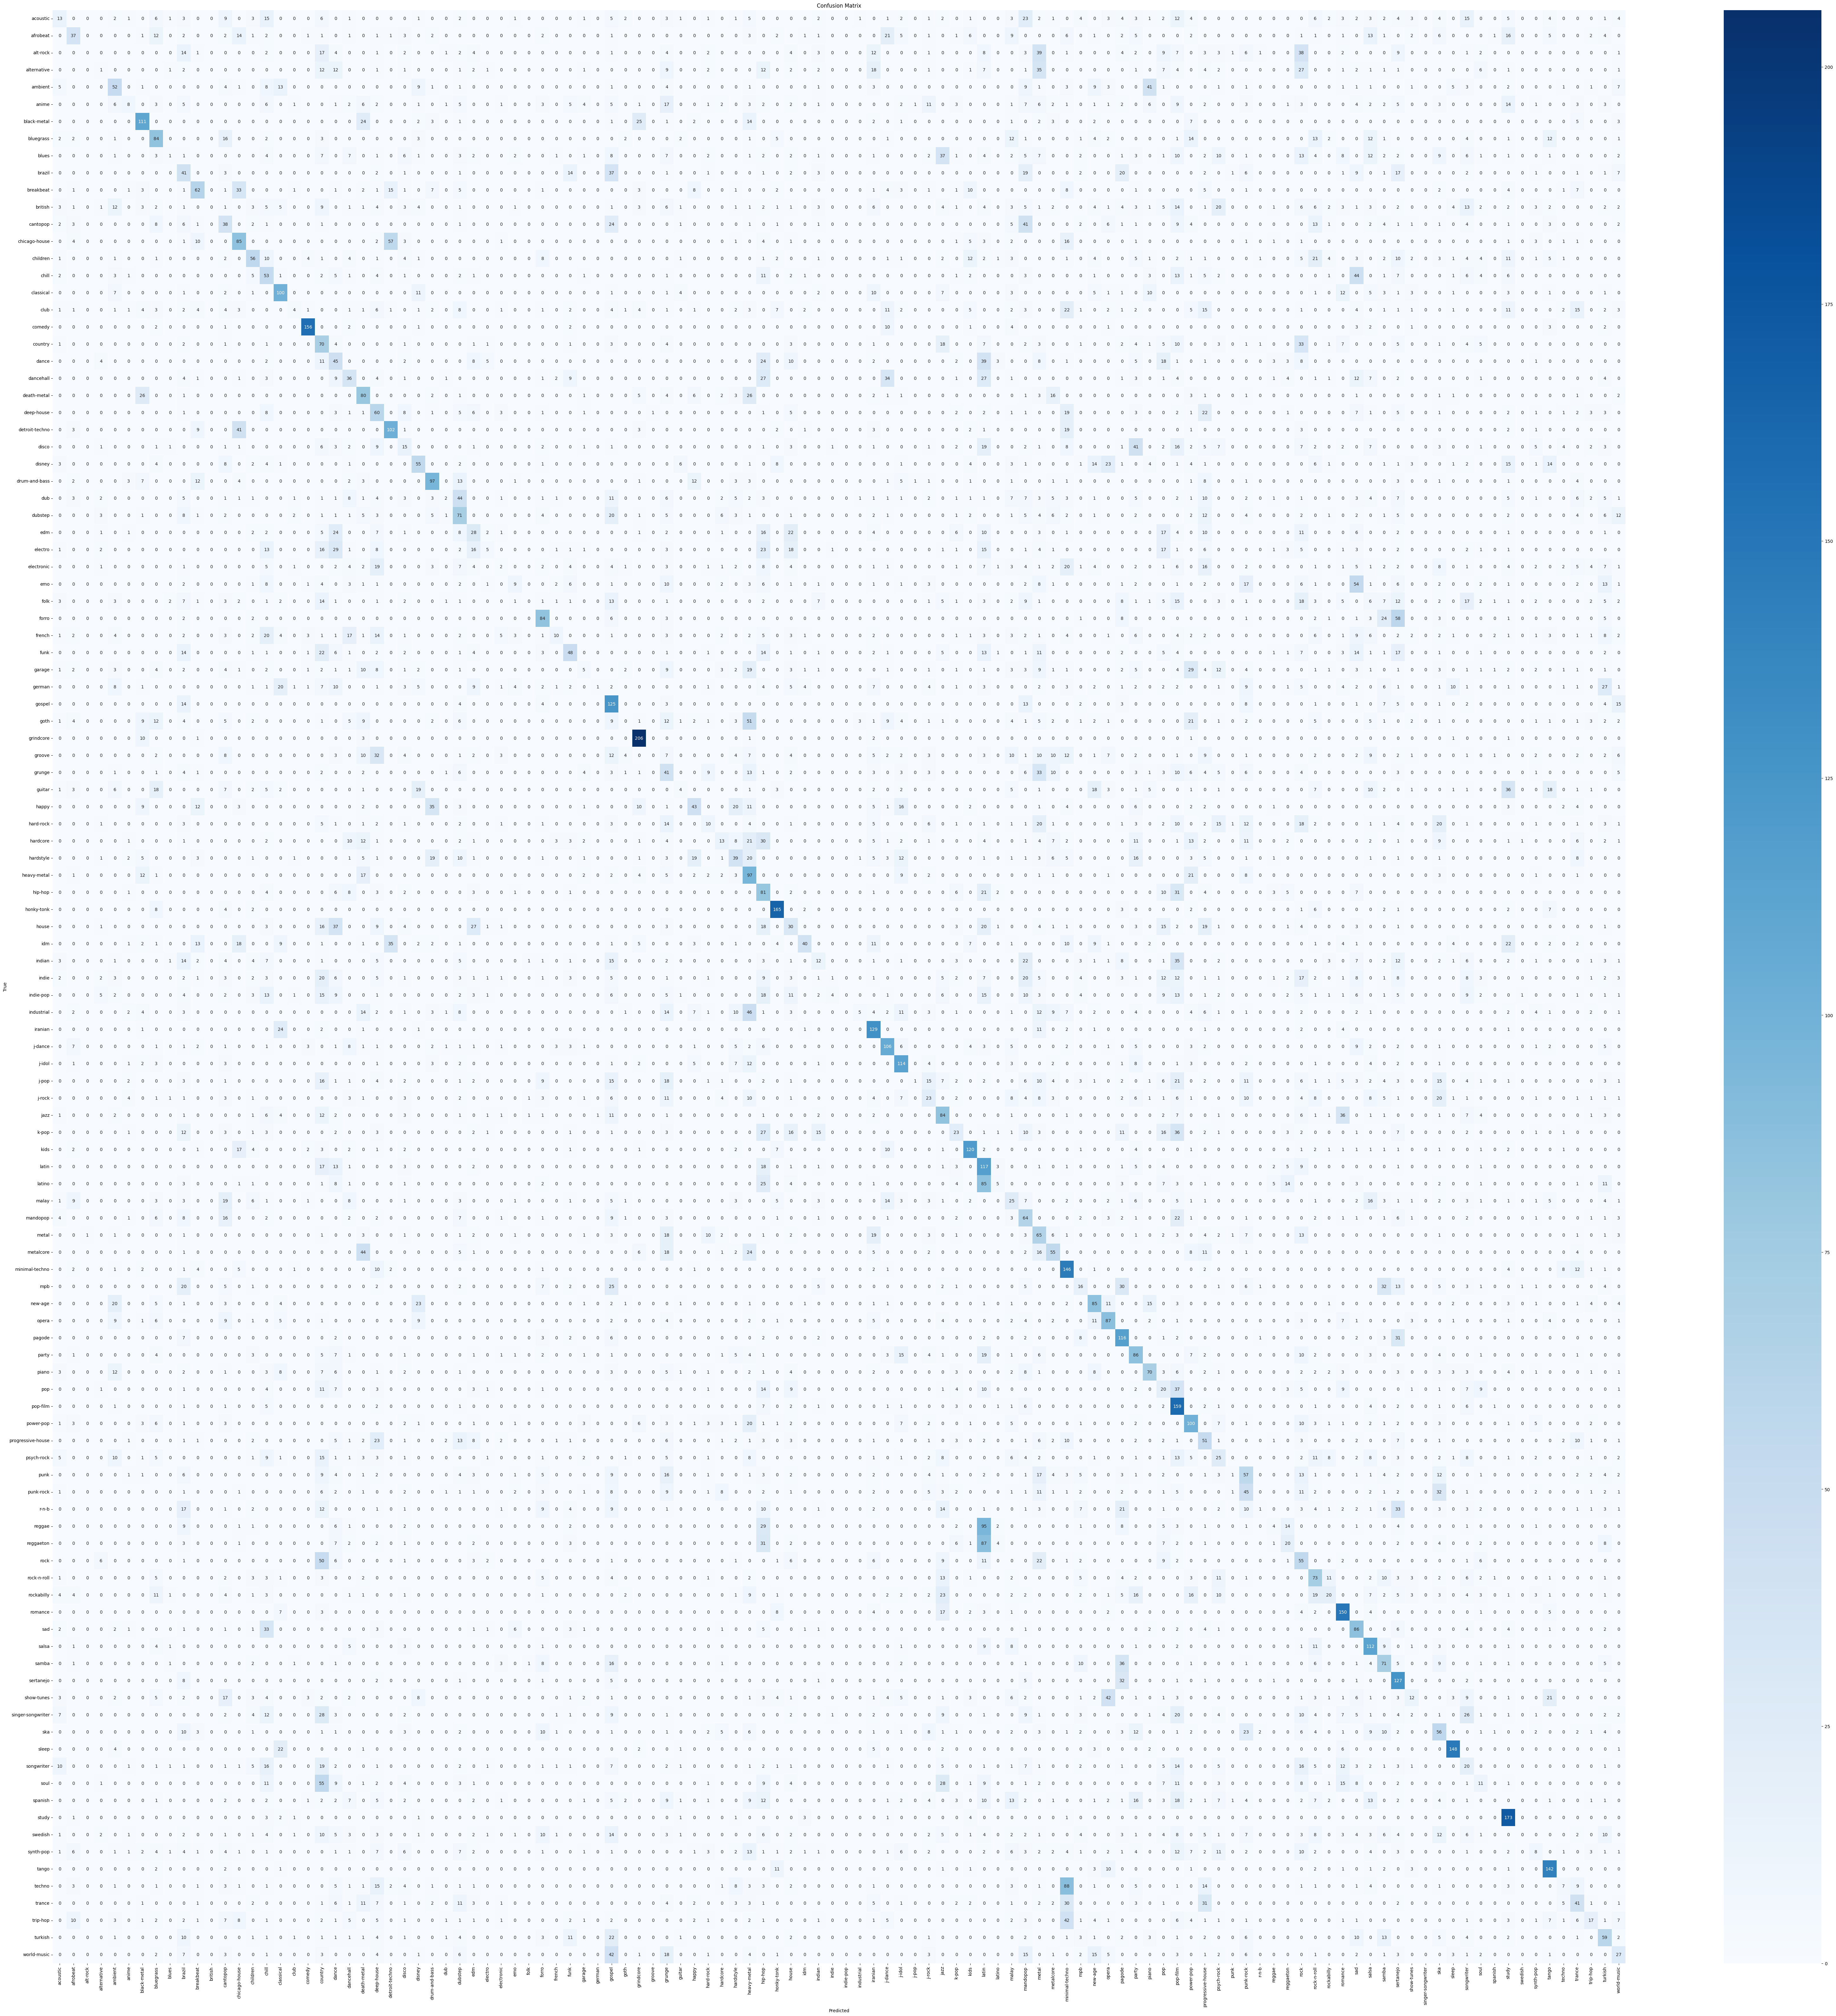

In [46]:
## The answer to number 2 and 3!
# Print training

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(80, 80))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Experimenting with multiple learning rates
learning_rates = [0.001, 0.01, 0.1]

results = {}

history_results = {
    'learning_rate': [],
    'accuracy': [],
    'val_accuracy': [],
    'loss': [],
    'val_loss': []
}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    # Re-build the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(y_train.shape[1], activation='softmax')  # Output layer
    ])

    # Compile the model with the current learning rate
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    history_results['learning_rate'].append(lr)
    history_results['accuracy'].append(history.history['accuracy'])
    history_results['val_accuracy'].append(history.history['val_accuracy'])
    history_results['loss'].append(history.history['loss'])
    history_results['val_loss'].append(history.history['val_loss'])

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Store the results for comparison
    results[lr] = {'loss': loss, 'accuracy': accuracy}

# Print out the results for all learning rates
for lr, metrics in results.items():
    print(f"\nLearning Rate: {lr}")
    print(f"Test Loss: {metrics['loss']:.4f}")
    print(f"Test Accuracy: {metrics['accuracy']:.4f}")


Training with learning rate: 0.001
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.0643 - loss: 4.2392 - val_accuracy: 0.1818 - val_loss: 3.4319
Epoch 2/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1380 - loss: 3.6230 - val_accuracy: 0.2043 - val_loss: 3.2786
Epoch 3/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1565 - loss: 3.5081 - val_accuracy: 0.2171 - val_loss: 3.1993
Epoch 4/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.1650 - loss: 3.4514 - val_accuracy: 0.2251 - val_loss: 3.1420
Epoch 5/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1706 - loss: 3.4090 - val_accuracy: 0.2299 - val_loss: 3.1079
Epoch 6/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1770 - loss: 3.3784 - val_accuracy: 0.2345 - val_loss: 3.0882
Epoch 7/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1805 - loss: 3.3511 - val_accuracy: 0.2371 - val_loss: 3.0571
Epoch 8/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1871 - loss: 3.3320 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2850/2850 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0878 - loss: 3.9855 - val_accuracy: 0.1758 - val_loss: 3.3705
Epoch 2/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1254 - loss: 3.6750 - val_accuracy: 0.1820 - val_loss: 3.3444
Epoch 3/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1295 - loss: 3.6326 - val_accuracy: 0.1800 - val_loss: 3.3470
Epoch 4/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1302 - loss: 3.6288 - val_accuracy: 0.1850 - val_loss: 3.3091
Epoch 5/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1329 - loss: 3.6223 - val_accuracy: 0.1831 - val_loss: 3.3153
Epoch 6/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1312 - loss: 3.6292 - val_accuracy: 0.1815 - val_loss: 3.2737
Epoch 7/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1293 - loss: 3.6280 - val_accuracy: 0.1894 - val_loss: 3.2644
Epoch 8/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1316 - loss: 3.6216 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.0086 - loss: 4.7903 - val_accuracy: 0.0085 - val_loss: 4.7854
Epoch 2/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0092 - loss: 4.7826 - val_accuracy: 0.0093 - val_loss: 4.7881
Epoch 3/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0084 - loss: 4.7824 - val_accuracy: 0.0084 - val_loss: 4.7722
Epoch 4/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.0095 - loss: 4.7836 - val_accuracy: 0.0082 - val_loss: 4.7855
Epoch 5/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0084 - loss: 4.7840 - val_accuracy: 0.0084 - val_loss: 4.7833
Epoch 6/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0087 - loss: 4.7826 - val_accuracy: 0.0088 - val_loss: 4.7779
Epoch 7/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0089 - loss: 4.7846 - val_accuracy: 0.0087 - val_loss: 4.7801
Epoch 8/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0081 - loss: 4.7841 - val_accurac

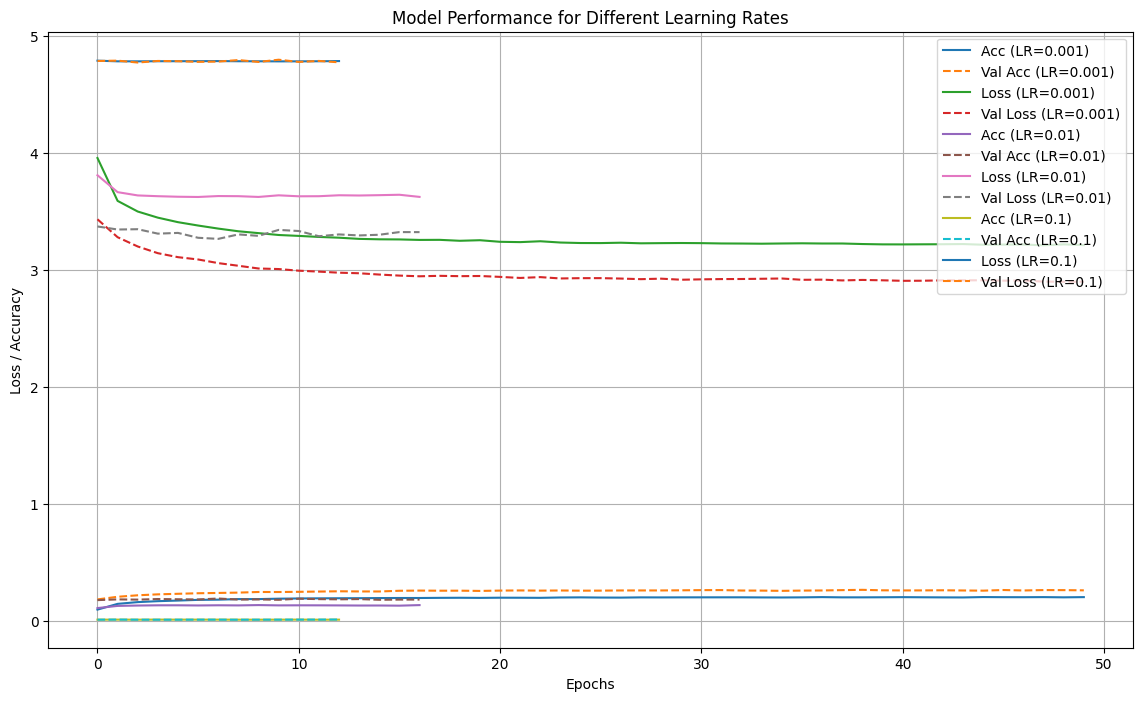

In [10]:
# Plot loss and accuracy per learning rate
plt.figure(figsize=(14, 8))
for i, lr in enumerate(learning_rates):
    plt.plot(history_results['accuracy'][i], label=f'Acc (LR={lr})')
    plt.plot(history_results['val_accuracy'][i], label=f'Val Acc (LR={lr})', linestyle='--')
    plt.plot(history_results['loss'][i], label=f'Loss (LR={lr})')
    plt.plot(history_results['val_loss'][i], label=f'Val Loss (LR={lr})', linestyle='--')

plt.title('Model Performance for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## NN Training: Detail how you trained your NN including how you learned hyperparameters such as learning rate.

## Explain the metrics you are using to assess the performance of your NN
1. Accuracy:  Proportion of correctly classified genres
2. Precision, Recall, F1-Score: Evaluated per genre using a classification report to measure how well the NN captures each genre’s characteristics.
3. Confusion Matrix: Visualize class-wise prediction performance.
4. Loss Curves:Monitor training and validation loss to detect overfitting.


1. 26%
2. In the code block with "## The answer to number 2 and 3!"
3. In the code block with "## The answer to number 2 and 3!"
4. In the code block directly before this one.